In [ ]:
# 새 책 !!!!! 한번에 끝내는~ p 124!!! 갸아아악 그치만 아직 20250228임~

# 판다스(pandas) 심화

## 데이터프레임 정렬

In [2]:
import numpy as np
import pandas as pd
print("DataFrame: ")
data = {
        'col1':[2,1,9,8,7,4],
        'col2':['A','A','B', np.nan,'D','C'],
        'col3':[0,1,9,4,2,3]
       }
index = [1,3,2,5,0,4]
df = pd.DataFrame(data,index=index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [4]:
# index axis=0(행)을 축으로 정렬
df = df.sort_index(axis=0)  # 꼭 업데이트(스스로에 대입) 해줄 것~!
df

,col1,col2,col3
0,7,D,2
1,2,A,0
2,9,B,9
3,1,A,1
4,4,C,3
5,8,NaN,4


In [5]:
# index axis=1(열) 을 축으로 정렬, 내림차순(False)
df = df.sort_index(axis=1, ascending=False)
df

,col3,col2,col1
0,2,D,7
1,0,A,2
2,9,B,9
3,1,A,1
4,3,C,4
5,4,NaN,8


In [6]:
# sort_value
sorted_df1 = df.sort_values('col1',ascending=True)  # col1에 대하여 value를 정리하라~
sorted_df1

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [8]:
# sort_value 2
sorted_df2 = df.sort_values(['col2','col1'],ascending=[True,False])
sorted_df2   # 같은 col2의 A 안에서 col1의 2가 우선된다 !!

,col3,col2,col1
1,0,A,2
3,1,A,1
2,9,B,9
4,3,C,4
0,2,D,7
5,4,NaN,8


In [27]:
# 🎸🚒어젯밤에  ~ 난🧑‍🚒 니가🎵 미워졌어~🚒🎶

## 데이터 분석용 함수

In [26]:
# 데이터 프레임의 index와 columns
import numpy as np
import pandas as pd
data ={
    'korean' :[50,60,70,30],
    'math':[30,np.nan,40,20]   # np.nan을 치면 np함수가 값을 넣어준다 !!
}
index =['a','b','c','d']
df = pd.DataFrame(data,index=index)
print(df.index)
print(df.columns)
df

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['korean', 'math'], dtype='object')


,korean,math
a,50,30.0
b,60,NaN
c,70,40.0
d,30,20.0


In [32]:
# count() 함수
print(df.count(axis=0))  # NaN은 값을 계산하지 않는다!! cf) axis = 0 기본값(생략가능)
print(df.count(axis=1))

korean    4
math      3
dtype: int64
a    2
b    1
c    2
d    2
dtype: int64


In [41]:
# max(), min(), sum(), mean()
print(df.max(),'\n')
print(df.max(axis=1),'\n',"="*25)
print(df.min(),'\n')
print(df.min(axis=1),'\n',"="*25)
print(df.sum(),'\n')
print(df.sum(axis=1),'\n',"="*25)
print(df.mean(),'\n')
print(df.mean(axis=1,skipna=False),'\n',"="*25) # NaN 값 보이게 하기
print(df.mean(axis=1,skipna=True),'\n',"="*25)  # 상황에 따라 결측값은 대체되는 것이 좋다! 

korean    70.0
math      40.0
dtype: float64 

a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64 
korean    30.0
math      20.0
dtype: float64 

a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64 
korean    210.0
math       90.0
dtype: float64 

a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64 
korean    52.5
math      30.0
dtype: float64 

a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64 
a    40.0
b    60.0
c    55.0
d    25.0
dtype: float64 


In [46]:
avg = df['math'].mean()
df['math']=df['math'].fillna(avg)
df  # 평균값을 은글슬쩍 대체해버렸어~

,korean,math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


## 그룹으로 묶기 groupby

In [ ]:
# SQL 할 때도 groupby가 있대~~

In [67]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key':['A','B','C','A','B','C'],
    'data1':[1,2,3,1,2,3],
    'data2':[4,4,6,0,6,1],
    #'data3':['안녕','a','b','하세요','pple','..라도 맞고 싶어서']
})
print("DataFrame : ")
df

DataFrame : 


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [68]:
df.groupby('key').sum()  # A, B, C가 한 데 묶였다 !! o.m.g

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


+++++++++++++++++++++++++++++++++++

*만약 숫자 3이 있다면...*

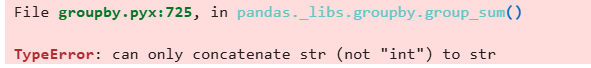
+++++++++++++++++++++++++++++++++++

In [69]:
df.groupby(['key','data1']).sum().reset_index()  # reset_index()로 정리해주는 것 잊지 말자~~!

,key,data1,data2
0,A,1,4
1,B,2,10
2,C,3,7


In [ ]:
# 🎼A B C easiest~🎤 One two three a triplus🎶 do re mi A B C🎵that's what you baby you and me girl🎶 !

In [72]:
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [73]:
df.groupby('key').aggregate({'data1':'max','data2':'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7
